<a href="https://colab.research.google.com/github/jjj5306/ComputerVisionClass/blob/main/%5BCV%5DAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Gray Level Transformation - 감마 연산

--2025-04-11 14:21:03--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0309(a)(washed_out_aerial_image).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 589115 (575K) [image/tiff]
Saving to: ‘Fig0309(a)(washed_out_aerial_image).tif’

Fig0309(a)(washed_o 100%[===================>] 575.31K  --.-KB/s    in 0.02s   

2025-04-11 14:21:03 (30.6 MB/s) - ‘Fig0309(a)(washed_out_aerial_image).tif’ saved [589115/589115]

uint8


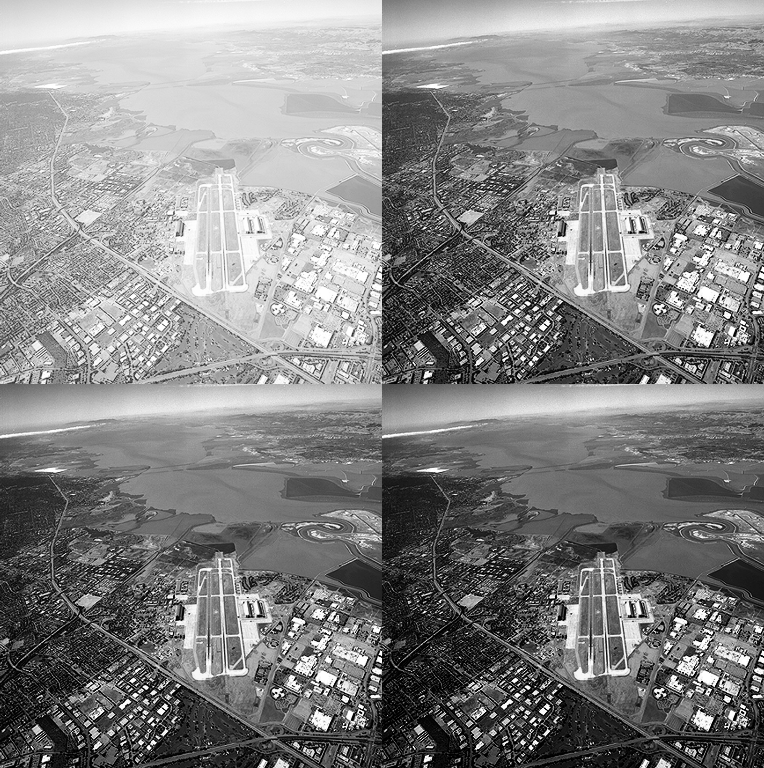

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# 이미지 다운
!wget https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0309\(a\)\(washed_out_aerial_image\).tif

# 이미지 읽기
img = cv2.imread('Fig0309(a)(washed_out_aerial_image).tif')
if img is None:
    print("이미지 읽기 실패")

# 이미지 크기 줄이기
img=cv2.resize(img,dsize=(0,0),fx=0.5,fy=0.5)

print(img.dtype) # 이미지 데이터가 unit8이므로 L=256

# 감마 연산 함수 정의
def gamma(f,gamma=1.0):
    f1=f/255.0			# L=256이라고 가정, 픽셀을 0~1로 정규화
    return np.uint8(255*(f1**gamma))   # nth power 감마 연산은 gamma를 제곱하면 됨.

# Figre 3.9의 주석을 보면 gamma=3.0, 4.0, 5.0로 실험을 진행한 것을 알 수 있음.
res_top=np.hstack((img, gamma(img,3.0)))
res_bottom=np.hstack((gamma(img,4.0), gamma(img,5.0)))
res=np.vstack((res_top,res_bottom))

cv2_imshow(res)

### 결과 분석
원본 영상은 밝기가 매우 높아 이미지의 요소들이 잘 보이지 않음. 이를 gamma 값을 3.0, 4.0, 5.0로 설정하고 nth power 감마 연산을 적용해보니 점점 밝기가 낮아져 이미지가 개선된 것을 확인할 수 있음.

---
# 2. Contrast Stretching
(c)에 해당되는 Contrast stretching 기법은 input 이미지의 값을 0\~r1, r1\~r2, r1\~r2 범위로 나누어서 각 구간별로 linear function을 적용해 변환하는 방법이다.
(d)에 해당되는 Thresholding은 Binary Contrast Enhancement 중 하나의 기법으로 일정 threshold 이하의 밝기 값은 0, 그 이상은 255로 변환하여 이진 영상을 만드는 방법이다. 여기서 threshold는 Otsu 알고리즘으로 정할 수 있다.


--2025-04-11 14:21:04--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0310(b)(washed_out_pollen_image).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791311 (773K) [image/tiff]
Saving to: ‘Fig0310(b)(washed_out_pollen_image).tif’

Fig0310(b)(washed_o 100%[===================>] 772.76K  --.-KB/s    in 0.02s   

2025-04-11 14:21:05 (33.8 MB/s) - ‘Fig0310(b)(washed_out_pollen_image).tif’ saved [791311/791311]

uint8
(444, 444, 3)
Otsu 알고리즘이 찾은 최적 threshold= 71.0


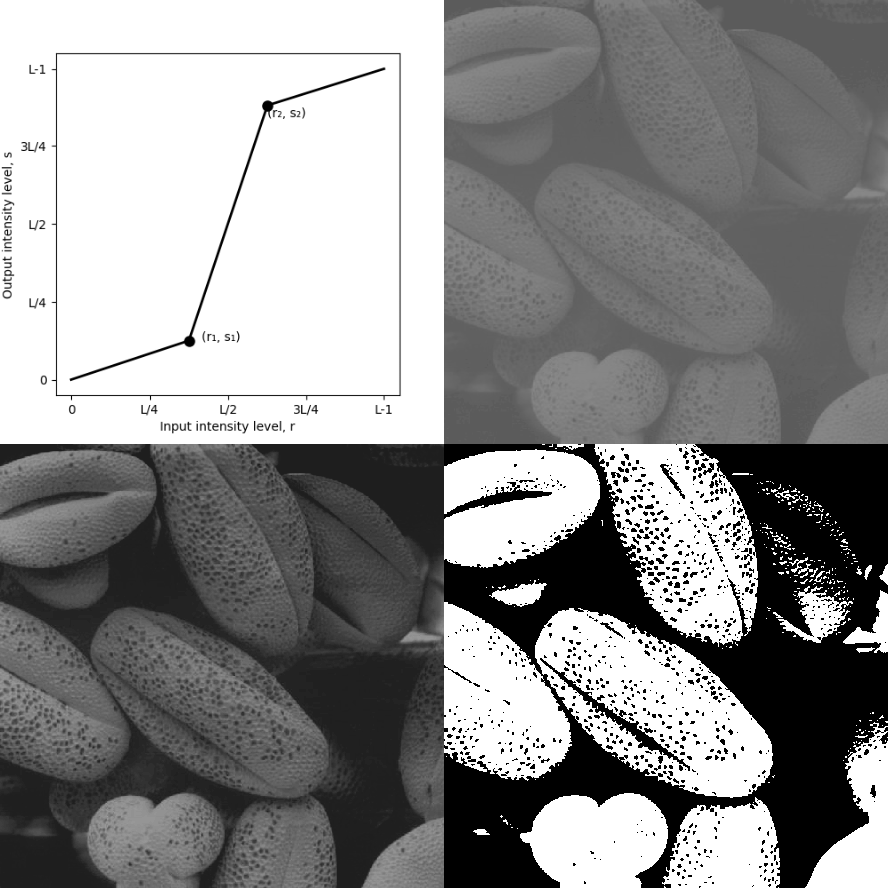

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# 이미지 다운
!wget https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0310\(b\)\(washed_out_pollen_image\).tif

# 이미지 읽기
img = cv2.imread('Fig0310(b)(washed_out_pollen_image).tif')
if img is None:
    print("이미지 읽기 실패")

# 이미지 크기 줄이기
img=cv2.resize(img,dsize=(0,0),fx=0.5,fy=0.5)

print(img.dtype) # 이미지 데이터가 unit8이므로 L=256
print(img.shape) # 이미지가 3채널이므로 각 채널별로 contrast stretching 적용해야 함

# contrast stretching 함수 정의
def contrast_stretching(image, r1, s1, r2, s2):
    # transformation을 적용할 빈 배열
    stretched = np.zeros_like(image, dtype=np.uint8)

    # input image의 픽셀 값의 대비에 따라 선형 함수 적용
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel = image[i, j]
            if pixel < r1:
                # 첫 번째 구간, (0, 0)과 (r1, s1)을 지나는 linear function
                stretched[i, j] = (s1 / r1) * pixel
            elif pixel < r2:
                # 두 번째 구간, (r1, s1)과 (r2, s2)을 지나는 linear function
                stretched[i, j] = s1 + ((s2 - s1) / (r2 - r1)) * (pixel - r1)
            else:
                # 세 번째 구간, (r2, s2)와 (255, 255)를 지나는 linear function
                stretched[i, j] = s2 + ((255 - s2) / (255 - r2)) * (pixel - r2)

    return stretched

# contrast stretching 파라미터 설정
# 파라미터는 그래프 및 실험 결과를 기반으로 r1 = L*3/8, s1 = L*1/8, r2 = L*5/8, s2 = L*7/8로 설정함. 저대비는 더욱 낮게, 고대비는 더욱 높게를 뜻함.
r1, s1 = 96, 32
r2, s2 = 160, 225


# 위의 파라미터대로 그래프 그리기(a)
def plot_transformation_function(r1, s1, r2, s2):
    L = 256
    plt.figure(figsize=(5, 5))
    plt.plot([0, r1, r2, L-1], [0, s1, s2, L-1], 'k-', linewidth=2)
    plt.plot(r1, s1, 'ko', markersize=8)  # (r1, s1) 점 표시
    plt.plot(r2, s2, 'ko', markersize=8)  # (r2, s2) 점 표시

    # 각 구분점 annotate
    plt.annotate(f'(r₁, s₁)', xy=(r1+10, s1))
    plt.annotate(f'(r₂, s₂)', xy=(r2, s2-10))

    # 라벨
    plt.xlabel('Input intensity level, r')
    plt.ylabel('Output intensity level, s')
    plt.xticks([0, L/4, L/2, 3*L/4, L-1], ['0', 'L/4', 'L/2', '3L/4', 'L-1'])
    plt.yticks([0, L/4, L/2, 3*L/4, L-1], ['0', 'L/4', 'L/2', '3L/4', 'L-1'])

    plt.savefig('transformation_function.png')
    plt.close()
    return

plot_transformation_function(r1, s1, r2, s2)

# 그래프 이미지 읽기
graph = cv2.imread('transformation_function.png')
if graph is None:
    print("이미지 읽기 실패")

# graph 크기를 img와 동일하게
graph = cv2.resize(graph, (int(graph.shape[1] * (img.shape[0] / graph.shape[0])), img.shape[0]))

# 결과 시각화
res_top = np.hstack((graph, img))

# 각 채널에 contrast stretching 적용(c)
# 채널 분리
(Blue, Green, Red) = cv2.split(img)
Blue_stretched = contrast_stretching(Blue, r1, s1, r2, s2)
Green_stretched = contrast_stretching(Green, r1, s1, r2, s2)
Red_stretched = contrast_stretching(Red, r1, s1, r2, s2)

# 처리된 채널 합치기
stretched_img = cv2.merge([Blue_stretched, Green_stretched, Red_stretched])

# thresholding 적용을 위해 gray scale 영상으로 변환
gray = cv2.cvtColor(stretched_img, cv2.COLOR_BGR2GRAY)
# Otsu 알고리즘 적용
t, bin_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('Otsu 알고리즘이 찾은 최적 threshold=', t)

# 결과 시각화를 위해 grayscale bin_img를 3채널로 변환
bin_img = cv2.cvtColor(bin_img, cv2.COLOR_GRAY2BGR)

# 결과 시각화
res_bottom = np.hstack((stretched_img, bin_img))

res = np.vstack((res_top, res_bottom))
cv2_imshow(res)

### 결과 분석
기존 input 이미지는 밝기의 차이가 뚜렷하지 않은 저대비 이미지이다. 해당 이미지를 contrast stretching으로 대비를 높였더니 이미지의 품질이 많이 개선된 것을 확인할 수 있다. 또한 contrast stretching 적용 후 Otsu 이진화를 적용하면 이진화가 더욱 잘 되는 것을 알 수 있다.


---
# 3. Conovolution

--2025-04-11 14:21:15--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/soccer.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 449034 (439K) [image/jpeg]
Saving to: ‘soccer.jpg’

soccer.jpg          100%[===================>] 438.51K  --.-KB/s    in 0.02s   

2025-04-11 14:21:15 (24.6 MB/s) - ‘soccer.jpg’ saved [449034/449034]

Origin



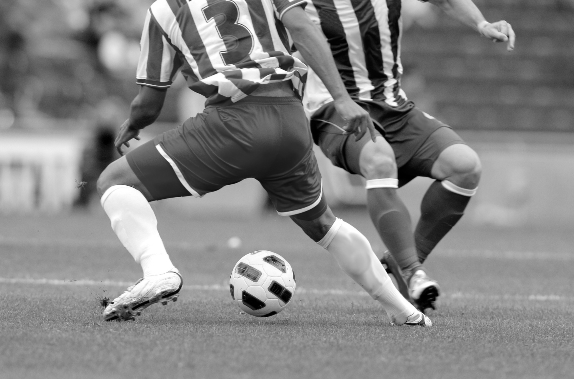



Box Filter



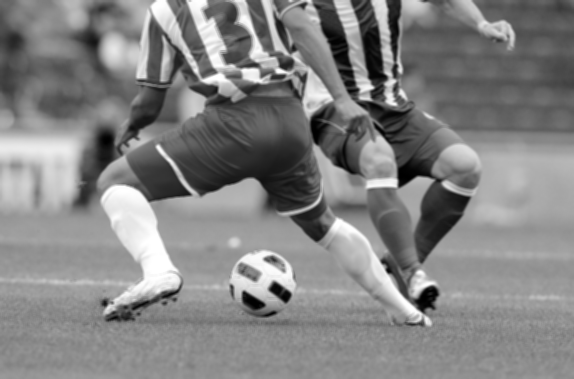



5x5 Gaussian Filter



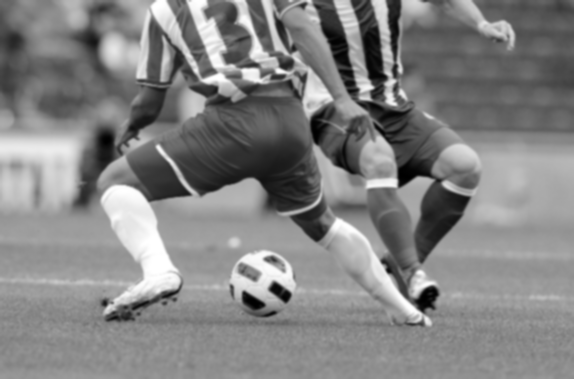



Laplacian Filter



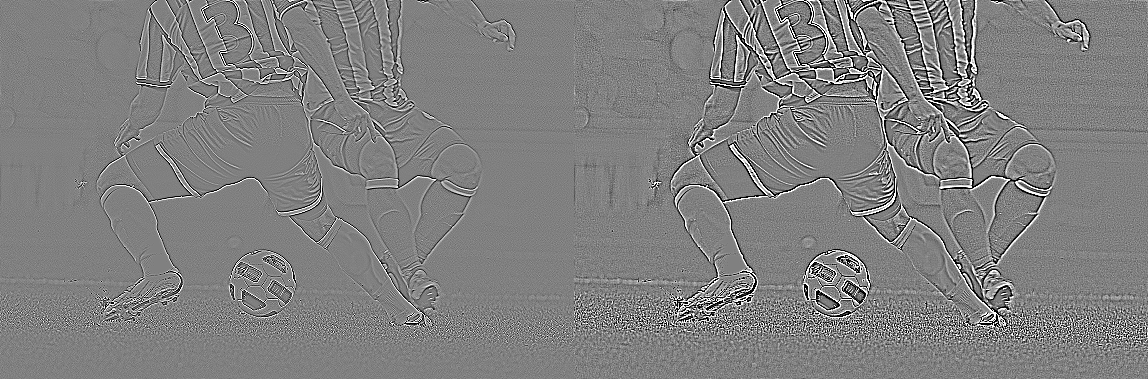



엠보싱 필터



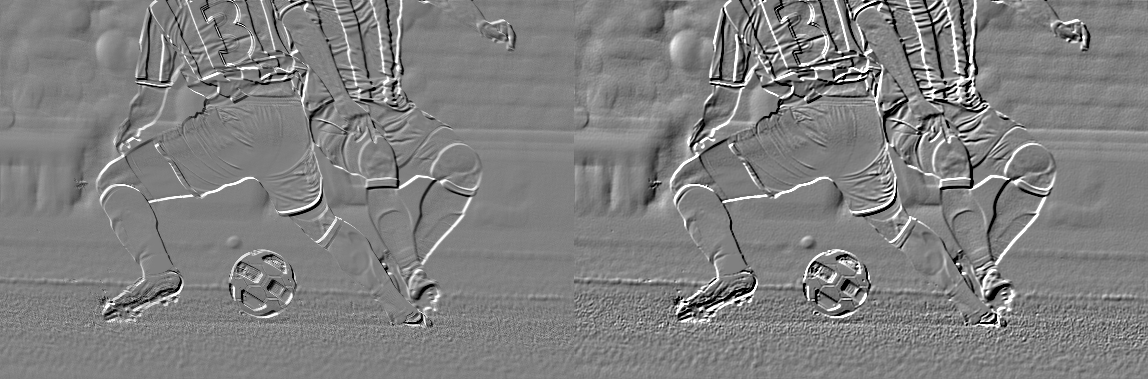

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# 이미지 다운
!wget https://raw.githubusercontent.com/kjcheoi-class/CV/main/soccer.jpg


# 이미지 읽기
img = cv2.imread('soccer.jpg')
if img is None:
    print("이미지 읽기 실패")

# 이미지 크기 줄이기
img=cv2.resize(img,dsize=(0,0),fx=0.4,fy=0.4)
# gray scale로 변환
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

print('Origin\n')
cv2_imshow(img)

# 예시 1. box 필터
box=np.array([[1/9, 1/9, 1/9],
              [ 1/9, 1/9, 1/9],
              [ 1/9, 1/9, 1/9]])
# convolution 연산 적용. 커널 영역에 해당하는 픽셀들의 평균이 되기에 클리핑과 16비트 변수로 변환은 하지 않아도 됨.
print('\n\nBox Filter\n')
cv2_imshow(cv2.filter2D(img, -1, box))

# 예시 2. 5x5 가우시안 필터
print('\n\n5x5 Gaussian Filter\n')
cv2_imshow(cv2.GaussianBlur(img, (5, 5), 0))

# 예시 3, 4. Laplacian 필터 1&2
print('\n\nLaplacian Filter\n')
laplacian_filter=np.array([[0, -1, 0],
                            [ -1, 4, -1],
                            [ 0, -1, 0]])
# convolution 연산 적용. 필터 연산 중 음수가 나올 수 있으므로 16비트 정수로 변환 후 클리핑 처리
img16=np.int16(img)
laplacian1=np.uint8(np.clip(cv2.filter2D(img16,-1,laplacian_filter)+128,0,255))
laplacian_filter=np.array([[-1, -1, -1],
                            [ -1, 8, -1],
                            [ -1, -1, -1]])
laplacian2=np.uint8(np.clip(cv2.filter2D(img16,-1,laplacian_filter)+128,0,255))

cv2_imshow(np.hstack((laplacian1,laplacian2)))

# 예시 4, 5. 엠보싱 필터 1&2
print('\n\n엠보싱 필터\n')
emboss_filter = np.array([[-1, 0, 0],
                           [0, 0, 0],
                           [0, 0, 1]])
# convolution 연산 적용. 필터 연산 중 음수가 나올 수 있으므로 16비트 정수로 변환 후 클리핑 처리
emboss1 = np.uint8(np.clip(cv2.filter2D(img16, -1, emboss_filter) + 128, 0, 255))
emboss_filter = np.array([[-1, -1, 0],
                           [-1, 0, 1],
                           [0, 1, 1]])
# 두 번째 엠보싱 필터 적용 - 다른 방향성 강조
emboss2 = np.uint8(np.clip(cv2.filter2D(img16, -1, emboss_filter) + 128, 0, 255))

cv2_imshow(np.hstack((emboss1, emboss2)))

### 결과 분석
- Box filter를 적용하면 주변 9개의 픽셀의 평균값을 취하므로 결과 영상 픽셀 값이 원래 영상과 비슷한 범위를 유지한다. 스무딩 효과가 있다.
- 가우시안 필터는 가우시안 분포를 따르는 가중치를 가진 마스크이다. 적용 결과 전체적인 밝기가 유지되고 스무딩 효과가 있다.
- 첫 번째 라플라시안 필터를 적용하면 수직, 수평 edge를 검출한다. 왜냐하면 필터가 대각선을 제외한 x, y 방향의 2차 미분을 합친 것이기 때문이다.
- 두 번째 라플라시안 필터를 적용하면 대각선 방향의 edge도 검출한다. 모든 방향에 대한 2차 미분이기 때문이다.
- 첫 번째 엠보싱 필터를 적용하면 입체감을 만들어낸다. 왜냐하면 필터가 좌상단 픽셀보다 우하단 픽셀이 밝다면 양수 값을 가져 밝게 만들고 우하단이 더 어둡다면 어둡게 만들기 때문이다.
- 두 번째 엠보싱 필터는 수평적, 수직적 밝기 변화도 더 강조한 입체감을 만들어낸다.

# 4. Edge Detection
Sobel 연산자를 변형한 45, -45도 방향의 대각선 edge 검출

--2025-04-11 14:21:16--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/school.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824868 (806K) [image/jpeg]
Saving to: ‘school.jpg’

school.jpg          100%[===================>] 805.54K  --.-KB/s    in 0.02s   

2025-04-11 14:21:16 (32.5 MB/s) - ‘school.jpg’ saved [824868/824868]

Origin



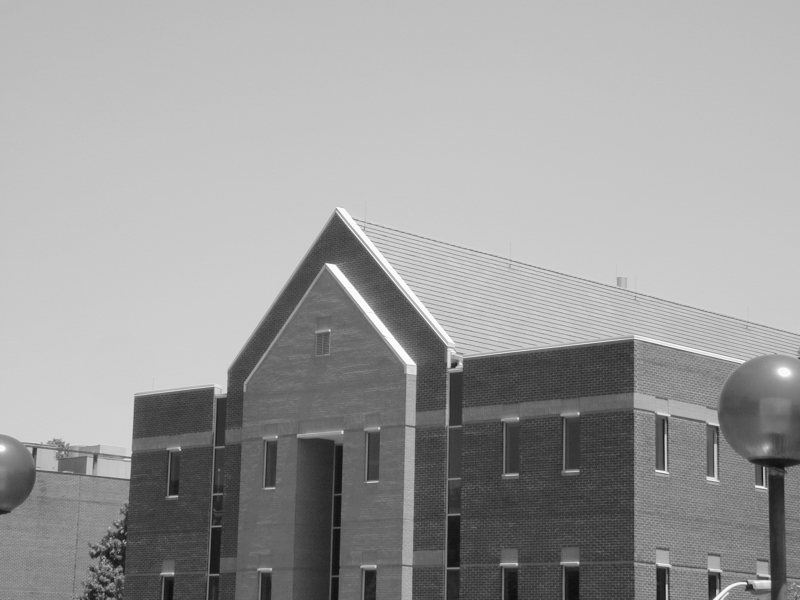



45 Edge Detectionr



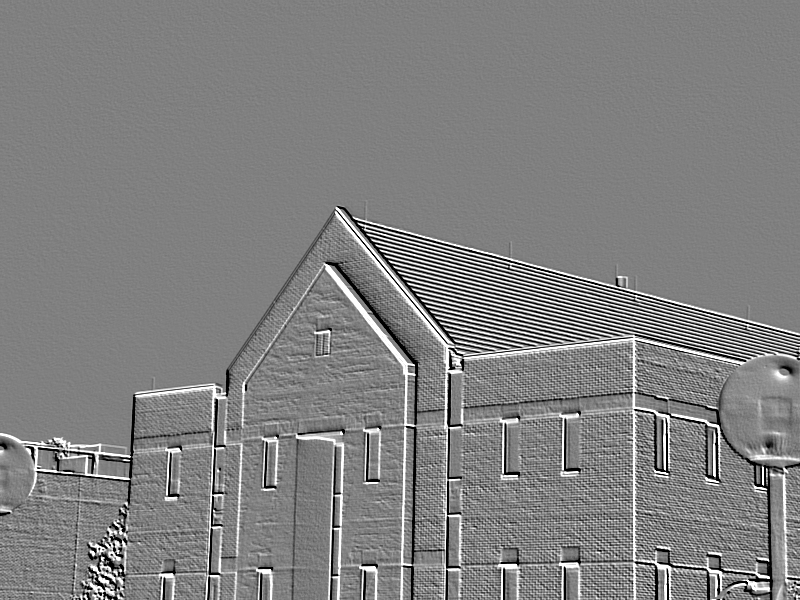



-45 Edge Detectionr



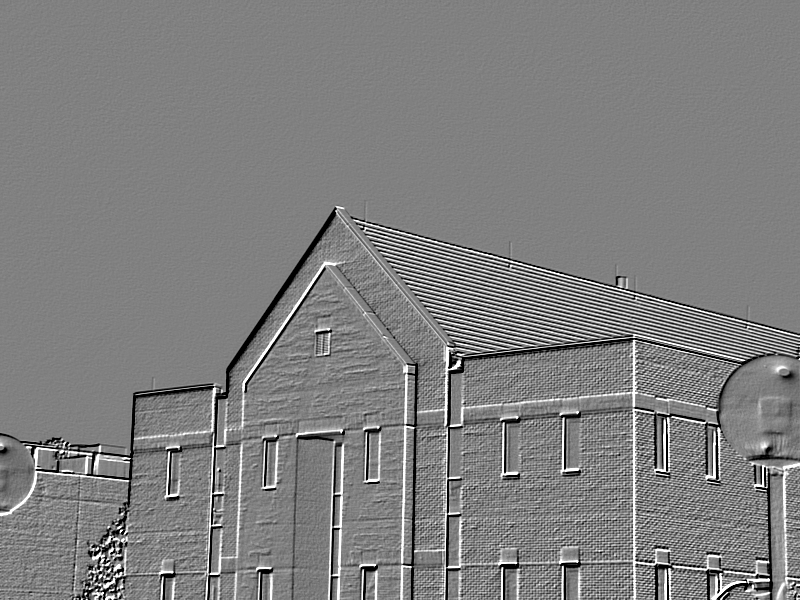

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# 이미지 다운
!wget https://raw.githubusercontent.com/kjcheoi-class/CV/main/school.jpg

# 이미지 읽기
img = cv2.imread('school.jpg')
if img is None:
    print("이미지 읽기 실패")

# 이미지 크기 줄이기
img=cv2.resize(img,dsize=(0,0),fx=0.5,fy=0.5)

print('Origin\n')
cv2_imshow(img)


# 45도 edge 검출용 필터 정의
print('\n\n45 Edge Detectionr\n')
# 45도 edge를 검출하려면 45도와 수직인 -45도의 밝기 변화를 감지해야 한다.
sobel_45_kernel=np.array([[0, 1, 2],
                         [ -1, 0, 1],
                         [ -2, -1, 0]])
# convolution 연산 적용. 커널 영역에 해당하는 픽셀들의 평균이 되기에 클리핑과 16비트 변수로 변환은 하지 않아도 됨.
img16=np.int16(img)
sobel_45=np.uint8(np.clip(cv2.filter2D(img16,-1,sobel_45_kernel)+128,0,255))
cv2_imshow(sobel_45)

# -45도 edge 검출용 필터 정의
print('\n\n-45 Edge Detectionr\n')
# -45도 edge를 검출하려면 -45도와 수직인 45도의 밝기 변화를 감지해야 한다.
sobel_135_kernel=np.array([[-2, -1, 0],
                         [ -1, 0, 1],
                         [ 0, 1, 2]])
# convolution 연산 적용. 커널 영역에 해당하는 픽셀들의 평균이 되기에 클리핑과 16비트 변수로 변환은 하지 않아도 됨.
img16=np.int16(img)
sobel_135=np.uint8(np.clip(cv2.filter2D(img16,-1,sobel_135_kernel)+128,0,255))
cv2_imshow(sobel_135)

### 결과 분석
45도 Edge Detection은 -45도 방향의 밝기 변화를 잘 감지한다. 반면 -45도 Edge Detection은 45도 방향의 밝기 변화를 잘 감지한다. 이는 지붕을 확인하면 가시적으로 확인할 수 있다.

---
# 5. Morphology

--2025-04-11 14:21:17--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/finger.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73452 (72K) [image/jpeg]
Saving to: ‘finger.jpg’

finger.jpg          100%[===================>]  71.73K  --.-KB/s    in 0.007s  

2025-04-11 14:21:18 (10.4 MB/s) - ‘finger.jpg’ saved [73452/73452]



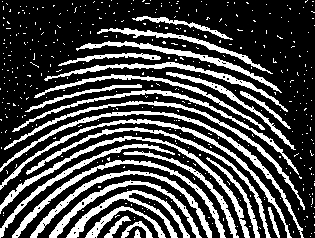



기본 개선


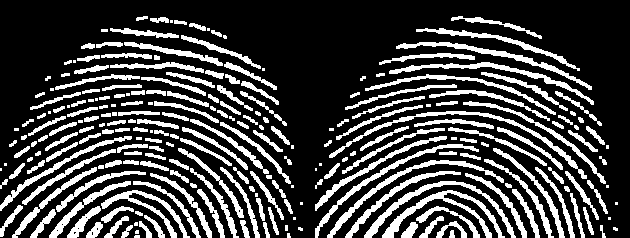



다른 방법의 개선


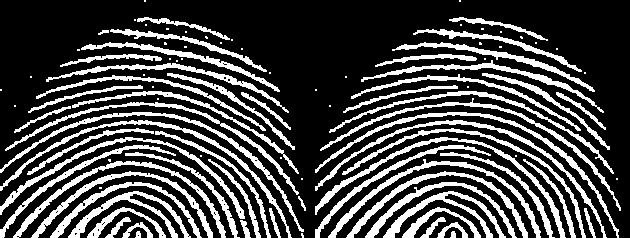

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# 이미지 다운
!wget https://raw.githubusercontent.com/kjcheoi-class/CV/main/finger.jpg

# 이미지 읽기
img = cv2.imread('finger.jpg')
if img is None:
    print("이미지 읽기 실패")

cv2_imshow(img)

print("\n\n기본 개선")
# 수업 시간에 배운 기본 방법 : 열림 -> 닫힘 적용
se=np.uint8([[1, 1, 1],
             [1, 1, 1],
             [1, 1, 1]])

# 열림 (침식 -> 팽창)
opening=cv2.dilate(cv2.erode(img, se, iterations=1), se, iterations=1)
# 닫힘 (팽창 -> 침식)
closing=cv2.erode(cv2.dilate(opening, se, iterations=1), se, iterations=1)

cv2_imshow(np.hstack((opening, closing)))

print("\n\n다른 방법의 개선")
# 1. 작은 구조요소로 열림을 통해 노이즈 조금 제거
se=np.uint8([[1, 1],
             [1, 1],])
# 열림 (침식 -> 팽창)
opening=cv2.dilate(cv2.erode(img, se, iterations=1), se, iterations=1)

# 2, 조금 더 큰 구조요소로 닫힘을 통해 끊긴 지문 복구
se=np.uint8([[1, 1, 1],
             [1, 1, 1],
             [1, 1, 1]])
# 닫힘 (팽창 -> 침식)
closing=cv2.erode(cv2.dilate(opening, se, iterations=1), se, iterations=1)

cv2_imshow(np.hstack((opening, closing)))


### 결과 분석
1. 수업 시간에 배운 방법
  지문 영상의 노이즈를 제거하기 위해 열림으로 노이즈를 제거하고, 노이즈를 제거하다 보니 지문 부분이 조금 끊기는 경향이 있다. 이를 닫힘 연산으로 이어주면 많이 개선된 것을 확인할 수 있다.
2. 다른 방법
  첫 번째 방법은 노이즈를 제거하면서 원본 지문의 연결된 부분도 끊어진다는 한계가 존재한다. 지문 인식을 생각했을 때 작은 노이즈보다 지문이 끊기는게 더 에러율이 높다고 생각하여 노이즈 제거는 조금 놓치더라도 지문의 원본을 유지하는 것에 더 집중하여 개선하였다.
  구체적인 방법은, 1번 방법보다 더 작은 구조 요소로 열림을 통해 노이즈는 대부분 제거하고 지문의 끊김을 최소화한다. 그리고 다시 큰 구조요소로 닫힘 연산을 통해 지문을 마저 이어주는 방식으로 개선하였다.

---
# 6. Morphology

--2025-04-11 14:21:18--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0905(a)(wirebond-mask).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30092 (29K) [image/tiff]
Saving to: ‘Fig0905(a)(wirebond-mask).tif’

Fig0905(a)(wirebond 100%[===================>]  29.39K  --.-KB/s    in 0s      

2025-04-11 14:21:19 (76.0 MB/s) - ‘Fig0905(a)(wirebond-mask).tif’ saved [30092/30092]



 original image / 대각선 선 제거


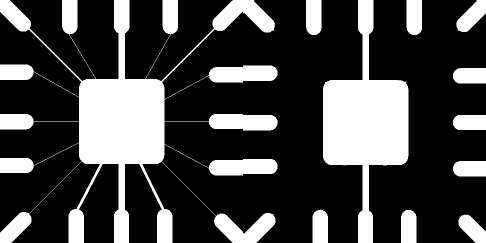



세로 선 제거 / 모든 선 제거


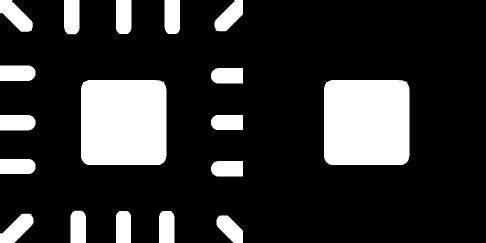

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# 이미지 다운
!wget https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0905\(a\)\(wirebond-mask\).tif

# 이미지 읽기
img = cv2.imread('Fig0905(a)(wirebond-mask).tif')
if img is None:
    print("이미지 읽기 실패")
img=cv2.resize(img,dsize=(0,0),fx=0.5,fy=0.5)

print("\n\n original image / 대각선 선 제거")
# 대각선 선을 제거하기 위해 조금 큰 꽉 찬 구조 요소 사용
se=np.uint8([[1, 1, 1, 1],
             [1, 1, 1, 1],
             [1, 1, 1, 1],
             [1, 1, 1, 1],
             ])
# opening
img1=cv2.dilate(cv2.erode(img, se, iterations=1), se, iterations=1)
cv2_imshow(np.hstack((img, img1)))

print("\n\n세로 선 제거 / 모든 선 제거")
# 세로 선 제거를 위한 구조요소
se=np.uint8([[1, 1, 1, 1, 1, 1, 1, 1]])
# opening
img2=cv2.dilate(cv2.erode(img1, se, iterations=1), se, iterations=1)

# 모든 선 제거를 위한 구조요소
se=np.uint8([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
             ])
# opening
img3=cv2.dilate(cv2.erode(img2, se, iterations=1), se, iterations=1)

cv2_imshow(np.hstack((img2, img3)))

### 결과 분석
얇은 대각선 성분을 제거하기 위해서는 대각선보다는 크지만 세로선보다는 작은 크기의 구조 요소로 Opening 연산을 수행하면 된다.  
다음으로 세로선은 세로선보다는 크고 다른 선들보다는 작은 구조 요소를 선택하면 되는데, 오직 세로선만 제거하면 되므로 행벡터 형태의 구조 요소를 사용하였다.  
나머지 선분은 매우 두껍지만 중앙의 사각형에 비해서는 두껍지 않으므로 굉장히 큰 크기의 구조 요소를 사용했다.

---
# 7. Edge Detection

--2025-04-11 14:21:19--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0939(a)(headCT-Vandy).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 262750 (257K) [image/tiff]
Saving to: ‘Fig0939(a)(headCT-Vandy).tif’

Fig0939(a)(headCT-V 100%[===================>] 256.59K  --.-KB/s    in 0.01s   

2025-04-11 14:21:19 (18.1 MB/s) - ‘Fig0939(a)(headCT-Vandy).tif’ saved [262750/262750]



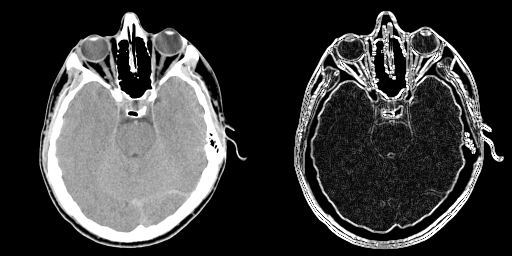

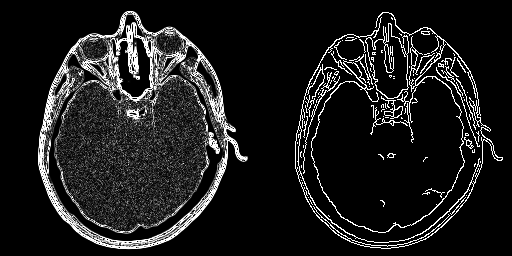

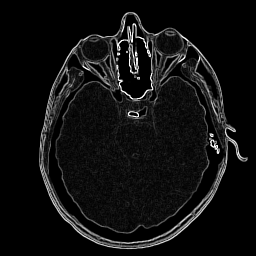

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# 이미지 다운
!wget https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0939\(a\)\(headCT-Vandy\).tif


# 이미지 읽기
img = cv2.imread('Fig0939(a)(headCT-Vandy).tif')
if img is None:
    print("이미지 읽기 실패")

# 이미지 크기 줄이기
img=cv2.resize(img,dsize=(0,0),fx=0.5,fy=0.5)
# gray scale로 변환
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# sobel edge detection
grad_x=cv2.Sobel(img,cv2.CV_32F,1,0,ksize=3)
grad_y=cv2.Sobel(img,cv2.CV_32F,0,1,ksize=3)
sobel_x=cv2.convertScaleAbs(grad_x)	# 절대값을 취해 양수 영상으로 변환
sobel_y=cv2.convertScaleAbs(grad_y)
sobel_combined = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0) # x, y gradient 하나로 합치기
cv2_imshow(np.hstack((img, sobel_combined)))

# Laplacian
laplacian_kernel=np.array([[1, 1, 1],
                           [1, -8, 1],
                           [1, 1, 1]])
# convolution 연산 적용.
img16=np.int16(img)
laplacian = cv2.filter2D(img16, -1, laplacian_kernel)
laplacian = cv2.convertScaleAbs(laplacian) # 절대값을 취해 양수 영상으로 변환

# Canny
canny=cv2.Canny(img,100,200)	# Tlow=100, Thigh=200으로 설정
cv2_imshow(np.hstack((laplacian, canny)))

# Morphological Gradient
# 형태학적 기울기는 A팽창B - A침식B
se=np.uint8([[1, 1],
             [1, 1],
             ])
# 팽창
dil=cv2.dilate(img, se)
# 침식
er = cv2.erode(img, se)
cv2_imshow(dil-er)

### 결과 분석
소벨 edge detection은 1차 미분 기반으로 수직, 수평 방향의 밝기 변화를 각각 계산한 후 결합하는 방식이다. 그만큼 내부 구조의 경계도 잘 감지하고 세세한 edge 들도 잘 포착하는 경향이 보인다.  
Laplacian edge detection은 2차 미분 기반으로 모든 방향의 edge를 동시에 검출한다. 2차 미분을 사용하는 만큼 엄청나게 세밀한 밝기 변화도 모두 edge로 처리하는 경향이 있다. 즉, 노이즈에 민감하다.  
Canny는 알고리즘의 목적함수의 기준을 최적화하는 방식인만큼 잘못된 edge는 존재하지 않고 edge가 얇고 명확하여 가장 보기 좋다. 하지만 파라미터를 어떻게 정하느냐에 따라 성능이 많이 달라진다.  
Morphological Gradient는 Canny와 성능은 비슷해 보이지만 edge가 조금 더 두꺼운 경향이 있다. 게다가 구조 요소의 설정에 따른 성능 차이가 다른 어떤 알고리즘보다도 심하다.

---
# 8. Smoothing

--2025-04-12 07:57:09--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0938(a)(cygnusloop_Xray_original).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 321002 (313K) [image/tiff]
Saving to: ‘Fig0938(a)(cygnusloop_Xray_original).tif’

Fig0938(a)(cygnuslo 100%[===================>] 313.48K  --.-KB/s    in 0.05s   

2025-04-12 07:57:09 (6.56 MB/s) - ‘Fig0938(a)(cygnusloop_Xray_original).tif’ saved [321002/321002]



Morphological Smoothing - ASF


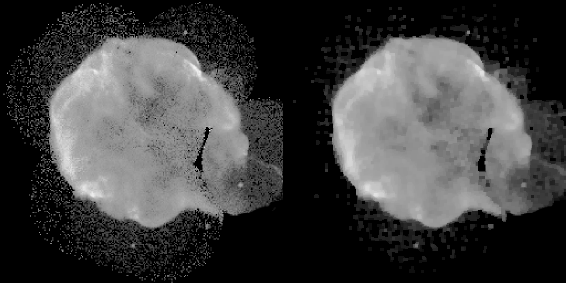

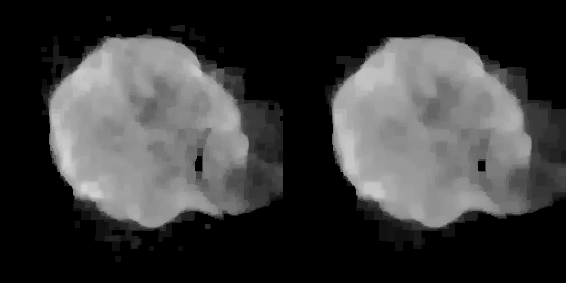



Smoothing Filter


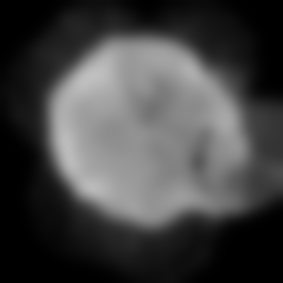

In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# 이미지 다운
!wget https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0938\(a\)\(cygnusloop_Xray_original\).tif


# 이미지 읽기
img = cv2.imread('Fig0938(a)(cygnusloop_Xray_original).tif')
if img is None:
    print("이미지 읽기 실패")

# 이미지 크기 줄이기
img=cv2.resize(img,dsize=(0,0),fx=0.5,fy=0.5)
# gray scale로 변환
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Morphological smoothing
print('\n\nMorphological Smoothing - ASF')
# ASF : 점점 더 커지는 구조요소로 열림-닫힘 연산 시퀀스를 연속해서 수행
# 1단계 3x3 구조요소
se=np.uint8([[1, 1, 1],
             [1, 1, 1],
             [1, 1, 1],
             ])
# opening
opening1=cv2.dilate(cv2.erode(img, se, iterations=1), se, iterations=1)
# closing
closing1=cv2.erode(cv2.dilate(opening1, se, iterations=1), se, iterations=1)
cv2_imshow(np.hstack((img, closing1)))

# 2단계 5x5 구조요소
se=np.uint8([[1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1],
             ])
# opening
opening2=cv2.dilate(cv2.erode(closing1, se, iterations=1), se, iterations=1)
# closing
closing2=cv2.erode(cv2.dilate(opening2, se, iterations=1), se, iterations=1)

# 3단계 7x7 구조요소
se=np.uint8([[1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1],
             [1, 1, 1, 1, 1, 1, 1],
             ])
# opening
opening3=cv2.dilate(cv2.erode(closing2, se, iterations=1), se, iterations=1)
# closing
closing3=cv2.erode(cv2.dilate(opening3, se, iterations=1), se, iterations=1)

cv2_imshow(np.hstack((closing2, closing3)))

# Smoothing Filter
print('\n\nSmoothing Filter')
cv2_imshow(cv2.GaussianBlur(img, (43, 43), 7))


### 결과 분석
Morphological Smoothing은 노이즈 제거에 탁월하다. 구조 요소를 잘 설정하면 원본을 최대한 제거하면서도 노이즈만 제거할 수 있다. 특히 ASF는 다양한 크기의 노이즈를 처리하는 효과를 보인다.  
하지만 Smoothing Filter는 노이즈 제거에 성능이 매우 안좋다. 극단적으로 큰 커널 크기와 sigma 값을 사용해도 전체적으로 흐려지기만 할 뿐 노이즈가 제거되지는 않는다. convolution 연산 과정을 생각해보면 노이즈가 주변으로 퍼지긴 하겠지만 제거되지는 않으므로 효과가 좋지 않다.

---
# 9. Binarization


--2025-04-12 07:11:28--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0940(a)(rice_image_with_intensity_gradient).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 360574 (352K) [image/tiff]
Saving to: ‘Fig0940(a)(rice_image_with_intensity_gradient).tif.27’

Fig0940(a)(rice_ima 100%[===================>] 352.12K  --.-KB/s    in 0.04s   

2025-04-12 07:11:28 (7.89 MB/s) - ‘Fig0940(a)(rice_image_with_intensity_gradient).tif.27’ saved [360574/360574]

원본 이미지


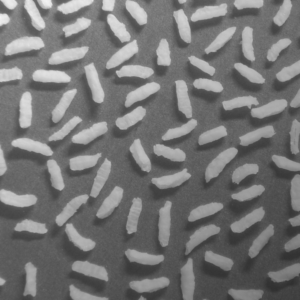



Otsu 알고리즘을 통한 이진화


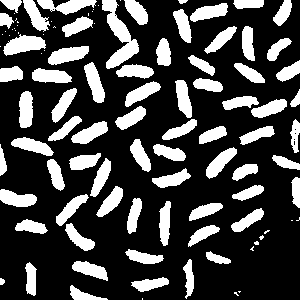



Top-hat 변환 후 Otsu 적용


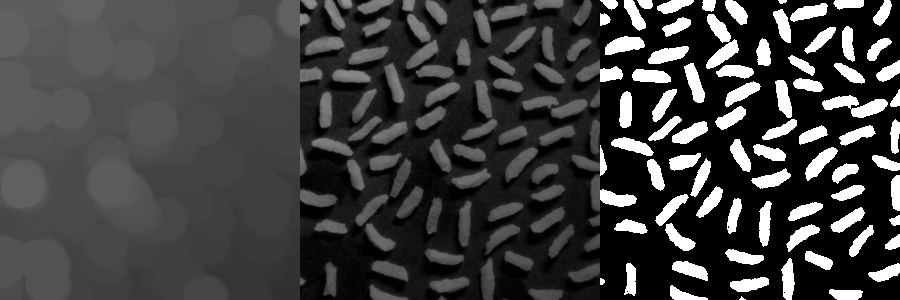

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# 이미지 다운
!wget https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0940\(a\)\(rice_image_with_intensity_gradient\).tif

# 이미지 읽기
img = cv2.imread('Fig0940(a)(rice_image_with_intensity_gradient).tif')
if img is None:
    print("이미지 읽기 실패")

# 이미지 크기 줄이기
img=cv2.resize(img,dsize=(0,0),fx=0.5,fy=0.5)

print('원본 이미지')
cv2_imshow(img)

# gray scale 영상으로 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 1. Otsu 알고리즘 적용
print('\n\nOtsu 알고리즘을 통한 이진화')
t, otsu_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2_imshow(otsu_img)

# 2. Top-hat 변환 후 Otsu 적용
print('\n\nTop-hat 변환 후 Otsu 적용')
# 먼저 배경영상 추출을 위해 객체보다 충분히 큰 구조 요소를 사용하여 열림 연산 수행
se=cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (40, 40))
# opening
opening=cv2.dilate(cv2.erode(gray, se, iterations=1), se, iterations=1)

# 원본 영상에서 배경을 빼서 배경을 균일하게 만듬
tophat = cv2.subtract(gray, opening)
res = np.hstack((opening, tophat))

# top-hat 변환 후 otsu 적용
t, otsu_img = cv2.threshold(tophat, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2_imshow(np.hstack((res, otsu_img)))



### 결과 분석
그냥 Otsu를 적용하게 되면 성능이 좋지 않다. 그 이유는 Otsu는 전역적 스레시홀딩을 결정하는 방법인데, 원 영상의 배경이 비균일한 밝기를 가지기에 조명이 어두워 조금 어둡게 나타난 쌀알 부분도 배경으로 이진화해버리기 때문이다.  
반면, Top-hat 변환을 적용하면 먼저 배경보다 밝은 객체를 opening 연산으로 제거하여 배경 영상을 얻고, 원본에서 배경을 빼면 배경은 거의 0에 가까운 어두운 값이 되고 객체는 원래 값을 유지하므로 밝다. 즉, 균일한 배경과 객체로 잘 분리되고 여기에 Otsu를 적용하면 훨씬 이진화가 잘 되는 것을 확인할 수 있다.

---
# 10. Morphological Segmentation

--2025-04-12 07:52:17--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0943(a)(dark_blobs_on_light_background).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 360678 (352K) [image/tiff]
Saving to: ‘Fig0943(a)(dark_blobs_on_light_background).tif.27’

Fig0943(a)(dark_blo 100%[===================>] 352.22K  --.-KB/s    in 0.04s   

2025-04-12 07:52:18 (7.70 MB/s) - ‘Fig0943(a)(dark_blobs_on_light_background).tif.27’ saved [360678/360678]



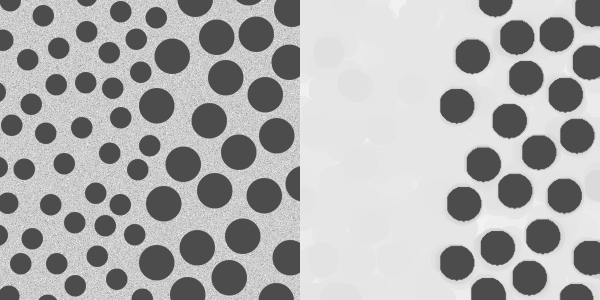

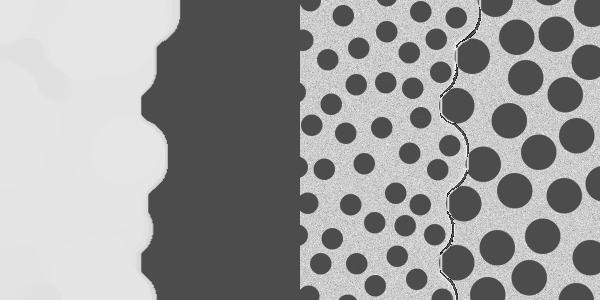

In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# 이미지 다운
!wget https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0943\(a\)\(dark_blobs_on_light_background\).tif

# 이미지 읽기
img = cv2.imread('Fig0943(a)(dark_blobs_on_light_background).tif')
if img is None:
    print("이미지 읽기 실패")

# 이미지 크기 줄이기
img=cv2.resize(img,dsize=(0,0),fx=0.5,fy=0.5)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 1. small blobs 제거, 관심 객체가 배경보다 어두우므로 닫힘 연산 수행
se=cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30, 30))
# closing
closing=cv2.erode(cv2.dilate(gray, se, iterations=1), se, iterations=1)
cv2_imshow(np.hstack((gray, closing)))

# 2. blobs 사이의 밝은 패치 제거. 얼룩들 간격보다 큰 구조요소로 opening 연산 수행
# opening
se=cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (60, 60))
opening=cv2.dilate(cv2.erode(closing, se, iterations=1), se, iterations=1)

# 3. morphological gradient로 edge 추출
# 형태학적 기울기는 A팽창B - A침식B
se=np.uint8([[1, 1, 1],
             [1, 1, 1],
             [1, 1, 1],
             ])
# 팽창
dil=cv2.dilate(opening, se)
# 침식
er = cv2.erode(opening, se)

gradient = (dil - er) + gray
cv2_imshow(np.hstack((opening, gradient)))

### 결과 분석
원본 영상에서 먼저 배경보다 어두운 small blobs를 제거하기 위해 small blobs 보다 큰 구조 요소로 닫힘 연산을 수행한다. 그리고 남아있는 blobs 사이의 밝은 패치를 제거하기 위해 그 간격보다 큰 구조 요소로 opening 연산을 수행한다. 마지막으로 형태학적 기울기 연산으로 edge를 추출하고 원본 영상에 덧씌우면 segmentation이 된다.